In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
df = pd.read_csv('/content/drive/MyDrive/CSE316 (AI L)/carprices.csv')

In [145]:
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [146]:
x = df.drop('Sell Price',1)
y = df['Sell Price']

<ipython-input-146-f5c9922afbdd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = df.drop('Sell Price',1)


In [147]:
x

,Car Model,Mileage,Age
0,BMW X5,69000,6
1,BMW X5,35000,3
2,BMW X5,57000,5
3,BMW X5,22500,2
4,BMW X5,46000,4
5,Audi,59000,5
6,Audi,52000,5
7,Audi,72000,6
8,Audi,91000,8
9,Mercedez Benz,67000,6


In [148]:
dummi = pd.get_dummies(x['Car Model'])

In [149]:
x = x.drop('Car Model',1)

<ipython-input-149-400d8dc2c563>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = x.drop('Car Model',1)


In [150]:
dummi

,Audi,BMW X5,Mercedez Benz,Toyota
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,1,0,0,0
6,1,0,0,0
7,1,0,0,0
8,1,0,0,0
9,0,0,1,0


In [151]:
x = pd.concat([x,dummi],axis = 'columns')

In [152]:
x

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [153]:
y


0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
13    42000
14    32000
15    55000
Name: Sell Price, dtype: int64

In [154]:
df

,Car Model,Mileage,Sell Price,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi,59000,29400,5
6,Audi,52000,32000,5
7,Audi,72000,19300,6
8,Audi,91000,12000,8
9,Mercedez Benz,67000,22000,6


In [155]:
x.shape

(16, 6)

In [156]:
x.columns

Index(['Mileage', 'Age', 'Audi', 'BMW X5', 'Mercedez Benz ', 'Toyota'], dtype='object')

In [157]:
x

,Mileage,Age,Audi,BMW X5,Mercedez Benz,Toyota
0,69000,6,0,1,0,0
1,35000,3,0,1,0,0
2,57000,5,0,1,0,0
3,22500,2,0,1,0,0
4,46000,4,0,1,0,0
5,59000,5,1,0,0,0
6,52000,5,1,0,0,0
7,72000,6,1,0,0,0
8,91000,8,1,0,0,0
9,67000,6,0,0,1,0


In [158]:
from sklearn.model_selection import train_test_split

In [159]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 1)

In [160]:
from sklearn.linear_model import LinearRegression

In [161]:
reg = LinearRegression()

In [162]:
reg.fit(x_train,y_train)

LinearRegression()

In [173]:
y_train_predict = reg.predict(x_train)

In [164]:
y_train_predict

array([17866.14470842, 30118.35853132, 36477.15982721, 36148.65010799,
       16904.48164147, 50851.34989201, 26706.3174946 , 11409.93520518,
       31576.29589633, 19851.24190065, 29990.06479482])

In [165]:
reg.intercept_

65093.911987041036

In [166]:
reg.coef_

array([-4.96274298e-01, -8.99784017e+02, -1.32474352e+03, -8.54779968e+03,
        2.61487581e+02,  9.61105562e+03])

In [167]:
reg.score(x_test,y_test)

0.8722448586655194

Text(0.5, 1.0, 'Price Prediction')

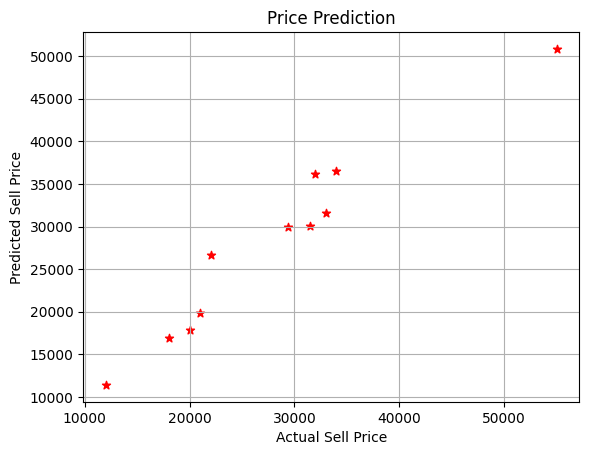

In [171]:
plt.scatter(y_train,y_train_predict,marker = '*',color = 'r')
plt.grid()
plt.xlabel("Actual Sell Price")
plt.ylabel("Predicted Sell Price")
plt.title("Price Prediction")